# <u><center>Project 2 Part 6 Core
- Authored by: Eric N. Valdez
- Date: 4/12/2024

## <u>Instructions
For this part of the project, you will be using machine learning and deep NLP to classify the reviews.

# Imports:

In [1]:
import joblib
%load_ext autoreload
%autoreload 2
import movie_functions as fn

# Load and Clean Data
- Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y:

In [2]:
# loading the joblib from part 5 of the project
df = joblib.load('Data-NLP/processed_data.joblib')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8650 entries, 843 to 575264
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  8650 non-null   object 
 1   review          8650 non-null   object 
 2   rating          7454 non-null   float64
 3   ratings         2419 non-null   object 
 4   tokens          8650 non-null   object 
 5   lemmatized      8650 non-null   object 
 6   tokens-joined   8650 non-null   object 
 7   lemmas-joined   8650 non-null   object 
dtypes: float64(1), object(7)
memory usage: 608.2+ KB


,original_title,review,rating,ratings,tokens,lemmatized,tokens-joined,lemmas-joined
movie_id,,,,,,,,
843,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife, the other a business executive and his wife. The ...",7.0,None,"[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, end, long, friendship, develop, usually, noodle, en...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, end, long, friendship, develop, usually, noodle, en...",fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave increasingly loose end long friendship develop usually noodle entirely platonic relationship solid tru...,fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave increasingly loose end long friendship develop usually noodle entirely platonic relationship solid tru...
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,High_rating,"[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
7443,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I liked it. Would personally recommend you give it a ...",6.0,None,"[roommate, hate, stop, motion, animation, watch, 2018, good, time, maybe, great, remember, think, little, kid, hold, degree, final, rating, ★, ★, ★, like, personally, recommend]","[roommate, hate, stop, motion, animation, watch, 2018, good, time, maybe, great, remember, think, little, kid, hold, degree, final, rating, ★, ★, ★, like, personally, recommend]",roommate hate stop motion animation watch 2018 good time maybe great remember think little kid hold degree final rating ★ ★ ★ like personally recommend,roommate hate stop motion animation watch 2018 good time maybe great remember think little kid hold degree final rating ★ ★ ★ like personally recommend
7443,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the film, it's a very well developed concept.\r\n\r\nThe...",8.0,None,"[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, producti

In [3]:
def create_groups(x):
    if x>=5.0:
        return "None"
    elif x <=9.0:
        return "None"
    elif x >=9.0: 
        return "High"
    elif x<=4.0:
        return "Low"

In [4]:
# Use the function to create a new "rating" column with groups
df['no_rating'] = df['rating'].map(create_groups)
df['no_rating'].value_counts(dropna=False)

None    7454
None    1196
Name: no_rating, dtype: int64

In [5]:
## Check class balance of 'rating'
df['ratings'].value_counts(normalize=True)

Low_rating     0.505994
High_rating    0.494006
Name: ratings, dtype: float64

In [6]:
# Create a df_ml without null ratings
df = df.dropna(subset=['ratings']).copy()
df.isna().sum()

original_title    0
review            0
rating            0
ratings           0
tokens            0
lemmatized        0
tokens-joined     0
lemmas-joined     0
no_rating         0
dtype: int64

In [7]:
df.head()

,original_title,review,rating,ratings,tokens,lemmatized,tokens-joined,lemmas-joined,no_rating
movie_id,,,,,,,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,High_rating,"[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,None
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",3.0,Low_rating,"[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc...","[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc...",underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation f...,underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation f...,None
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,2.0,Low_rating,"[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]","[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]",entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide push m movie turn well hard beat lousy piece crap movie,entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide pus

In [8]:
# Drop a column
df.drop(columns=['no_rating'], inplace=True)
df.head()

,original_title,review,rating,ratings,tokens,lemmatized,tokens-joined,lemmas-joined
movie_id,,,,,,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,High_rating,"[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",3.0,Low_rating,"[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc...","[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc...",underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation f...,underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation f...
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,2.0,Low_rating,"[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]","[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]",entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide push m movie turn well hard beat lousy piece crap movie,entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide push m movie turn well h

In [9]:
# # Define X and y
X = df['review']
y = df['ratings']

X.head()

movie_id
7443                                                    A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.
955     The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...
955     After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....
2621    Okay, I will admit I can be a bit of an easy grader when it

In [10]:
y.value_counts(normalize=True)

Low_rating     0.505994
High_rating    0.494006
Name: ratings, dtype: float64

# Machine Learning:
- For this project, you will use modeling pipelines with the text vectorizer and model in the same pipeline.
- This will make saving and uploading the models in a deployed application very easy.

## `Create a Text Vectorizer`
- Select a sklearn vectorizer for your task.
    - Remember to consider your preprocessing choices, such as using stopwords, ngram_range, etc.

In [11]:
# Split data into train, test, val
from sklearn.model_selection import train_test_split

# Create a 70/30 train-split 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5, random_state=42)

#
(len(X_train_full), len(X_val), len(X_test))

(1693, 363, 363)

In [12]:
# Check class balance
y_train_full.value_counts(normalize=True)

Low_rating     0.511518
High_rating    0.488482
Name: ratings, dtype: float64

In [13]:
# Instantiate a RandomUnderSampler
sampler = fn.RandomUnderSampler(random_state=42)

# Fit_resample on the reshaped X_train data and y-train data
X_train, y_train = sampler.fit_resample(X_train_full.values.reshape(-1,1),y_train_full)

# Flatten the reshaped X_train data back to 1D
X_train = X_train.flatten()

# Check for class balance
y_train.value_counts()

High_rating    827
Low_rating     827
Name: ratings, dtype: int64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
## Instantiate CountVectorizer
countvector = CountVectorizer()#min_df=3, ngram_range=(1,2))
countvector.fit(X_train)

# Transform X_train to see the result (for demo only)
countvector.transform(X_train)

<1654x22256 sparse matrix of type '<class 'numpy.int64'>'
	with 218723 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.naive_bayes import MultinomialNB
## Create a model pipeline 
nbayes = MultinomialNB()

count_pipe = fn.Pipeline([('vectorizer', countvector), 
                       ('bayes', nbayes)])

count_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('bayes', MultinomialNB())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 High_rating       0.99      0.97      0.98       827
  Low_rating       0.97      0.99      0.98       827

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



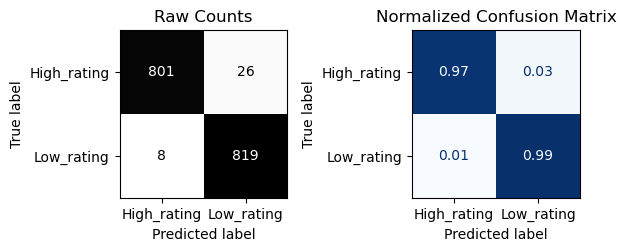


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 High_rating       0.88      0.87      0.87       179
  Low_rating       0.87      0.88      0.88       184

    accuracy                           0.87       363
   macro avg       0.87      0.87      0.87       363
weighted avg       0.87      0.87      0.87       363



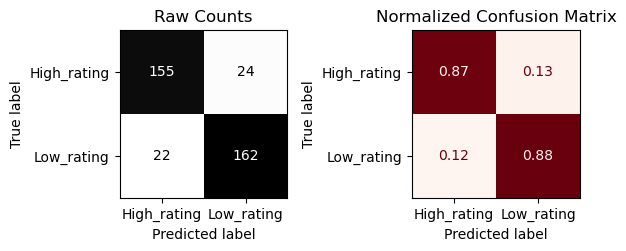

In [16]:
# Evaluate count_pipe
fn.evaluate_classification(count_pipe, X_train, y_train, X_test, y_test)

In [17]:
# Instantiate TF-IDF Vectorizor
tfidf = TfidfVectorizer()

## Instantiate model
tfidfbayes = MultinomialNB()


## Create pipeline: tfidf_pipe
tfidf_pipe = fn.Pipeline([('vectorizer', tfidf),
                       ('bayes', tfidfbayes)])



## Fit pipeline
tfidf_pipe.fit(X_train, y_train)
                      

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('bayes', MultinomialNB())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 High_rating       0.98      0.97      0.98       827
  Low_rating       0.97      0.98      0.98       827

    accuracy                           0.98      1654
   macro avg       0.98      0.98      0.98      1654
weighted avg       0.98      0.98      0.98      1654



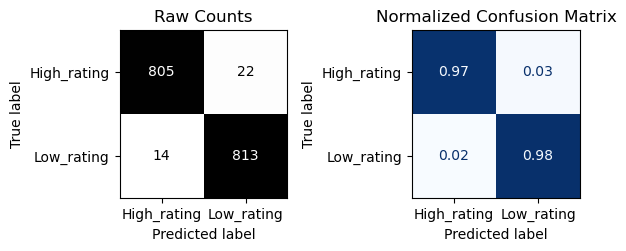


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 High_rating       0.86      0.90      0.88       179
  Low_rating       0.90      0.86      0.88       184

    accuracy                           0.88       363
   macro avg       0.88      0.88      0.88       363
weighted avg       0.88      0.88      0.88       363



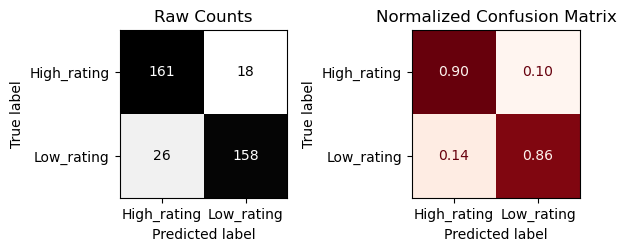

In [18]:
# Evaluate the tfidf_pipeline model
fn.evaluate_classification(tfidf_pipe, X_train, y_train, X_test, y_test)

## `Build a Machine Learning Model`
- Build a sklearn modeling pipeline with a text vectorizer and a classification model.
    - Suggested Models: MultinomialNB, LogisticRegression (you may need to increase max_iter), RandomForestClassifier
- Fit and evaluate the model using the machine learning classification models from sklearn.
    - In a Markdown cell, document your observations from your results. (e.g., how good is the model overall? Is it particularly good/bad at predicting one class?)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe  = fn.Pipeline([('vectorizer',CountVectorizer()),
                    ('clf',RandomForestClassifier(class_weight='balanced'))])
rf_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()),
  ('clf', RandomForestClassifier(class_weight='balanced'))],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': RandomForestClassifier(class_weight='balanced'),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': 'balanced',
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'clf__max_leaf_node

In [20]:
%%time
# Create grid search
grid_search = fn.GridSearchCV(rf_pipe, params_combined, cv=3, verbose=1, n_jobs=-1)
    
    
# Fit the model
grid_search.fit(X_train, y_train)
grid_search.best_params_

NameError: name 'params_combined' is not defined

In [21]:
best_rf_pipe = grid_search.best_estimator_
fn.evaluate_classification(best_rf_pipe, X_train, y_train, X_test, y_test)

NameError: name 'grid_search' is not defined

## `GridSearch Text Vectorization`
- Attempt to improve your model by tuning the text preprocessing steps.

In [ ]:
gs_pipe = Pipeline([('vectorizer',CountVectorizer()),
                    ('clf',MultinomialNB())])
gs_pipe.get_params()

In [ ]:
# Define params to try for both vectorizers
param_grid_shared = {
    "vectorizer__max_df": [0.7, 0.8, 0.9],
    'vectorizer__min_df': [ 2, 3, 4 ], 
    "vectorizer__max_features": [None, 1000, 2000],
    "vectorizer__stop_words": [None,'english']
}

# Setting params for the count vectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid_shared
}


# Setting params for tfidf vectorizer 
param_grid_tfidf = {
    'vectorizer': [TfidfVectorizer()],
    "vectorizer__norm": ["l1", "l2"],
    "vectorizer__use_idf": [True, False],
    **param_grid_shared
}

# combine into list of params
params_combined = [param_grid_count, param_grid_tfidf]
params_combined

In [ ]:
%%time
# Create grid search
grid_search = GridSearchCV(gs_pipe, params_combined, cv=3, verbose=1, n_jobs=-1)
    
    
# Fit the model
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
# Evaluate the best estimator
best_gs_pipe = grid_search.best_estimator_
evaluate_classification(best_gs_pipe, X_train, y_train, X_test, y_test)

### `Construct a grid of parameters for the text vectorization step. Consider trying:`

In [ ]:
# CountVectorizer/TfidVectorizer

In [ ]:
# Stopwords

In [ ]:
# Ngrams_range

In [ ]:
# Min_df/max_df

### `Fit and evaluate the grid search results:`

In [ ]:
# What were the best parameters?


In [ ]:
# How does the best estimator perform when evaluated on the training and test data?

# <u>Deep NLP (RNNs):
- For this part of the project, you will use the a Keras TextVectorization layer as part of your RNN model.
- This serves the same purpose as using sklearn pipeline:
    - `It bundles text preparation into the model, making it deployment-ready.

#### Create train/test/val datasets:

#### Create a Keras Text Vectorization layer:

#### Build an RNN with the TextVectorization Layer:

#### Deliverables:
1. New Notebook file for text classification
    - These should be submitted as the link to a repository with an appropriate name `(NOT ProJECT 2)`